### Парсинг данных и создание датафрейма

In [34]:
# %matplotlib inline
import os

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook

In [35]:
paths = glob.glob(f"build/*ParticleData_t*.csv")

In [36]:
# Вытаскиваем из первого файла названия столбцов
with open(paths[0], 'r') as f:
    lines = []
    while True:
        line = f.readline()
        if line[0] != '#':
            break
        lines.append(line)
    title = lines[1].replace('#title ', '')[:-1]                        # переделать через regex
    sep = chr(int(lines[2].replace('#separator ', '')[:-1]))            # переделать через regex
    vsc_sep = chr(int(lines[3].replace('#vector_separator ', '')[:-1])) # переделать через regex
    columns = [' '.join(i.split(' ')[2:])[:-1] for i in lines[4:]]
    metarows_len = len(lines)

In [37]:
data = pd.DataFrame()
for path in paths:
    item = pd.read_csv(path, skiprows=metarows_len, names=columns)
    data = data.append(item, ignore_index=True)

In [38]:
data

,particle_name,X,Y,Z,vX,vY,vZ,energy
0,e-,-133.04500,81.0331,-36.06310,-0.414359,0.253746,-0.110604,0.202747
1,e-,111.50000,112.5720,-21.52500,0.416829,0.410675,-0.090500,0.271120
2,e-,-60.53540,114.5360,-93.72830,-0.228808,0.411783,-0.352593,0.268335
3,e-,62.94150,-63.2695,-132.67800,0.234554,-0.223248,-0.479264,0.260797
4,e-,-7.08991,116.7700,-109.00700,-0.030055,0.419751,-0.388199,0.256408
...,...,...,...,...,...,...,...,...
4125036,e-,-85.80890,129.5020,-37.86990,-0.308441,0.457587,-0.142497,0.254473
4125037,e-,77.61730,139.7870,-1.79295,0.261473,0.466322,-0.008007,0.228601
4125038,e-,-22.18330,145.7970,61.79990,-0.070620,0.513578,0.214842,0.247965
4125039,e-,-86.00890,71.7960,-114.08700,-0.293367,0.256716,-0.397313,0.244610


In [39]:
set(data["particle_name"])

{'e-', 'gamma'}

In [40]:
len(data[data["particle_name"]=="e-"])

4050414

In [41]:
len(data[data["particle_name"]=="gamma"])

74627

### Создание диаграммы

In [42]:
xyz_e = data[data["particle_name"]=="gamma"][["X", "Y", "Z"]]

In [45]:
def cart2sph(x, y, z):
    hxy = np.hypot(x, y)
    r = np.hypot(hxy, z)
    el = np.arctan2(z, hxy)
    az = np.arctan2(y, x)
    return az, el, r

In [63]:
df_pol = cart2sph(xyz_e["X"], xyz_e["Y"],xyz_e["Z"])

In [77]:
pol_phi_theta = np.array([df_pol[0].to_numpy(), df_pol[1].to_numpy()])

In [80]:
print(f"φ range: {min(pol_phi_theta[0])} to {max(pol_phi_theta[0])}")
print(f"θ range: {min(pol_phi_theta[1])} to {max(pol_phi_theta[1])}")

φ range: -3.1415390466607658 to 3.141411938121803
θ range: -1.567850984311136 to 1.224654557517799


In [88]:
xyz_e["X"].to_numpy().shape

(74627,)

In [94]:
xy_np = np.array([xyz_e["X"].to_numpy(), xyz_e["Y"].to_numpy()])

In [96]:
plt.scatter(xy_np[0], xy_np[1])

ValueError: s must be a scalar, or float array-like with the same size as x and y

<IPython.core.display.Javascript object>


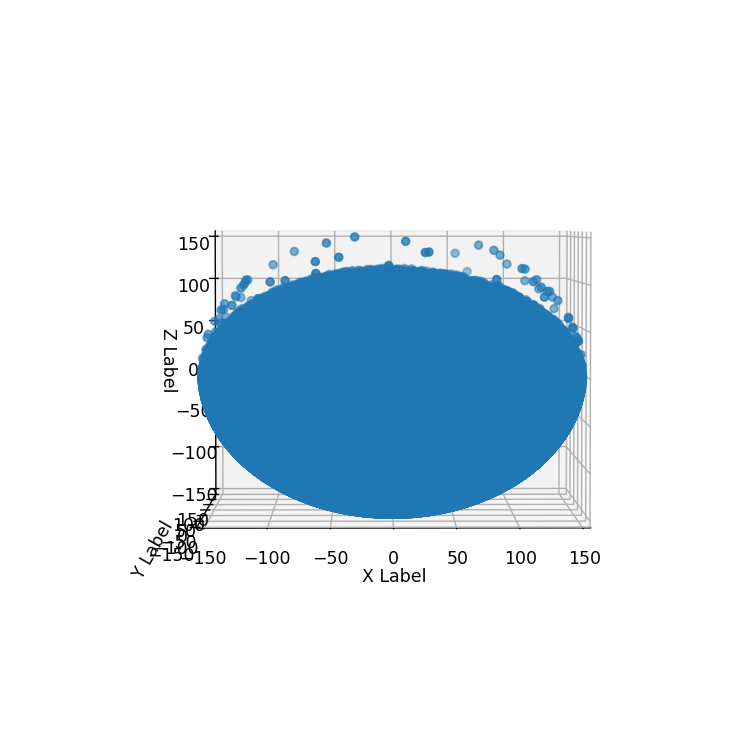

In [81]:
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz_e["X"], xyz_e["Y"],xyz_e["Z"])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim(-150, 150)
ax.set_ylim(-150, 150)
ax.set_zlim(-150, 150)
plt.show()